# try doc2vec with different vector length 100, 200, 300 with true label

## Doc2vec with different vector length with true labels trained.

In [1]:
import pandas as pd

fake_pii = pd.read_csv("../clean_data/Cleaned_train_text_with_pii_2018_12_29_07_26_56_266227.csv")

In [2]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from tqdm import tqdm

In [3]:
paragraph = fake_pii['Cleaned_text'].copy()

tags = fake_pii['Labels'].copy()

In [4]:
True_tag_documents = [TaggedDocument(paragraph.iloc[index].split(" "), [tags.iloc[index]])\
                      for index in tqdm(range(len(tags)))]

100%|██████████| 800000/800000 [00:31<00:00, 25710.19it/s]


In [5]:
true_tag_doc2vec_100 = Doc2Vec(True_tag_documents,vector_size = 100, min_count = 1, epochs = 15, workers = 2 )

In [6]:
true_tag_doc2vec_200 = Doc2Vec(True_tag_documents,vector_size = 200, min_count = 1, epochs = 15, workers = 2 )

In [7]:
true_tag_doc2vec_300 = Doc2Vec(True_tag_documents,vector_size = 300, min_count = 1, epochs = 15, workers = 2 )

## Visualizing different vector_size by using PCA

In [8]:
from visualizer import get_doc2vec_matrix, color_dict 

In [9]:
pii_label_matrix_100 = get_doc2vec_matrix(texts = fake_pii['Cleaned_text'], model = true_tag_doc2vec_100)

pii_label_matrix_200 = get_doc2vec_matrix(texts = fake_pii['Cleaned_text'], model = true_tag_doc2vec_200)

pii_label_matrix_300 = get_doc2vec_matrix(texts = fake_pii['Cleaned_text'], model = true_tag_doc2vec_300)

100%|██████████| 800000/800000 [11:45<00:00, 1134.12it/s]


In [10]:
from yellowbrick.features.pca import PCADecomposition
import matplotlib.pyplot as plt

pii_labels = fake_pii["Labels"]
colors_map = pii_labels.map(color_dict)

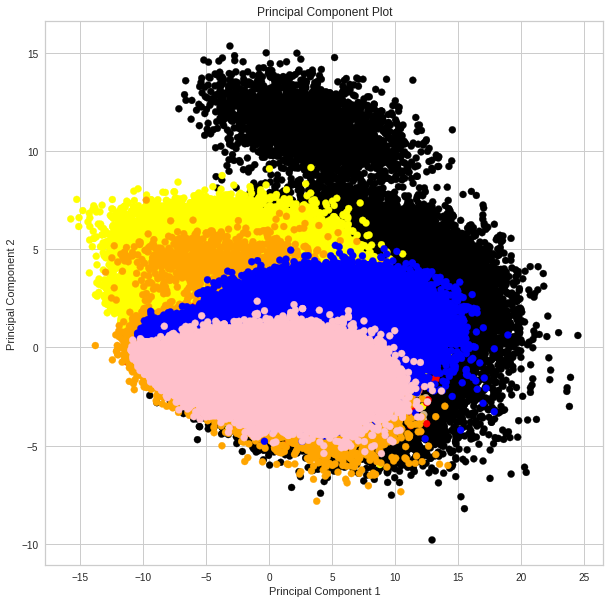

In [11]:
plt.figure(figsize=(10,10))
PCAvisualizer = PCADecomposition(scale=True, color = colors_map, proj_dim = 2)
PCAvisualizer.fit_transform(pii_label_matrix_100, pii_labels)
PCAvisualizer.poof()

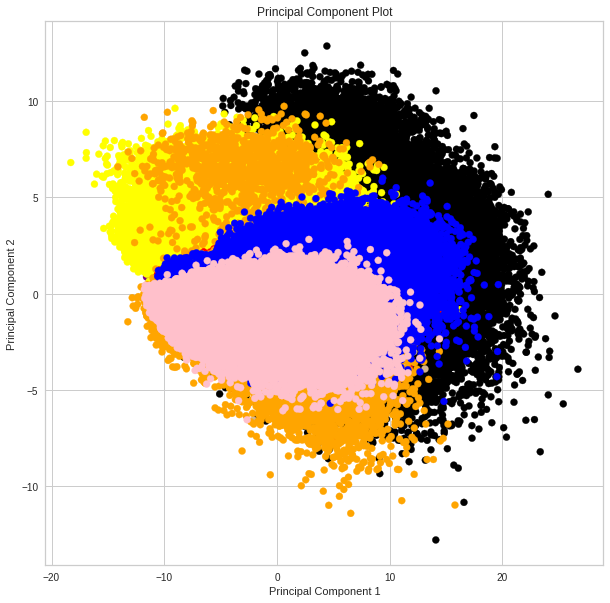

In [12]:
plt.figure(figsize=(10,10))
PCAvisualizer = PCADecomposition(scale=True, color = colors_map, proj_dim = 2)
PCAvisualizer.fit_transform(pii_label_matrix_200, pii_labels)
PCAvisualizer.poof()

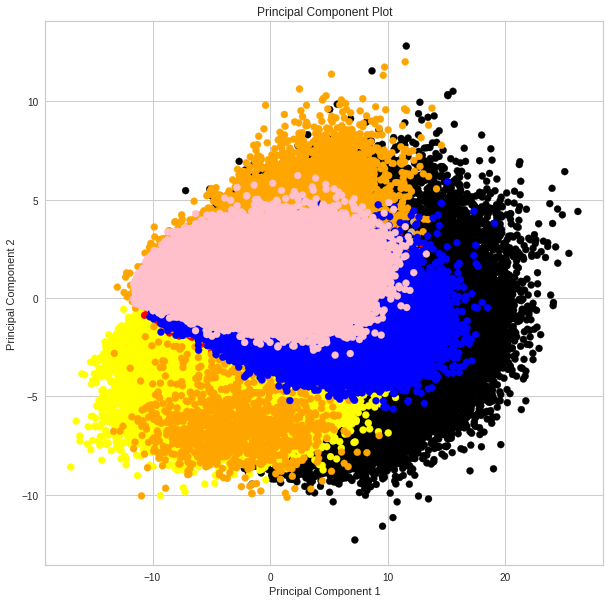

In [13]:
plt.figure(figsize=(10,10))
PCAvisualizer = PCADecomposition(scale=True, color = colors_map, proj_dim = 2)
PCAvisualizer.fit_transform(pii_label_matrix_300, pii_labels)
PCAvisualizer.poof()

## Try logistic regression on different vector length

In [14]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [15]:
%%time
%%notify -m "model finished training"

from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(LogisticRegression(random_state=0 , max_iter=10000,n_jobs = 1))

param_grid = {
    'logisticregression__C':expon(scale = 2),
    'logisticregression__penalty':['l1','l2']
}

random_cv_lr_label_100 = RandomizedSearchCV(estimator= pipe, param_distributions = param_grid, cv =10,\
                                        error_score = 0,n_iter = 10 , scoring = 'f1', \
                                        return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_label_100.fit(pii_label_matrix_100, fake_pii['Target'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=1, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd5b86922e8>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

<IPython.core.display.Javascript object>

CPU times: user 1min 2s, sys: 1.49 s, total: 1min 3s
Wall time: 38min 7s


In [100]:
%%time
%%notify -m "metric are ready"
from sklearn.metrics import classification_report

binary_pred = random_cv_lr_label_100.predict(pii_label_matrix_100)
binary_true = fake_pii["Target"]
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50    100000
           1       0.92      0.97      0.94    700000

   micro avg       0.90      0.90      0.90    800000
   macro avg       0.78      0.69      0.72    800000
weighted avg       0.88      0.90      0.89    800000



<IPython.core.display.Javascript object>

CPU times: user 772 ms, sys: 216 ms, total: 988 ms
Wall time: 675 ms


Text(51,0.5,'True values')

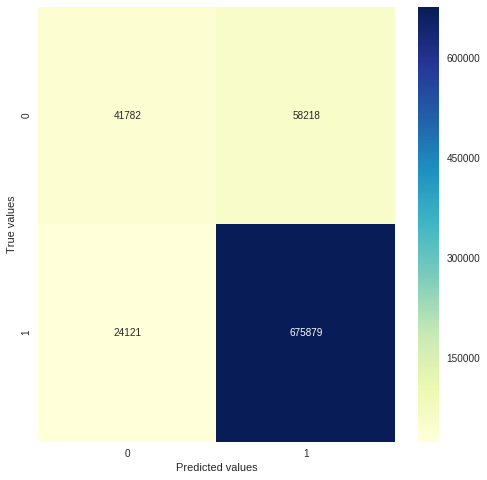

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

In [110]:
from sklearn.externals import joblib
joblib.dump(random_cv_lr_label_100.best_estimator_, 'doc2vec_label_100_logistic_no_weights.pkl'\
            ,compress = 1)

['doc2vec_label_100_logistic_no_weights.pkl']

## Vector size 200

In [17]:
%%time
%%notify -m "model finished training"
random_cv_lr_label_200 = RandomizedSearchCV(estimator= pipe, param_distributions = param_grid, cv =10,\
                                        error_score = 0,n_iter = 10 , scoring = 'f1', \
                                        return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_label_200.fit(pii_label_matrix_200, fake_pii['Target'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=1, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd5b86922e8>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

<IPython.core.display.Javascript object>

CPU times: user 42.7 s, sys: 1.6 s, total: 44.2 s
Wall time: 55min 10s


In [78]:
%%time
%%notify -m "metric are ready"
from sklearn.metrics import classification_report

binary_pred = random_cv_lr_label_200.predict(pii_label_matrix_200)
binary_true = fake_pii["Target"]
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.38    100000
           1       0.91      0.97      0.94    700000

   micro avg       0.88      0.88      0.88    800000
   macro avg       0.74      0.63      0.66    800000
weighted avg       0.86      0.88      0.87    800000



<IPython.core.display.Javascript object>

CPU times: user 815 ms, sys: 229 ms, total: 1.04 s
Wall time: 664 ms


Text(51,0.5,'True values')

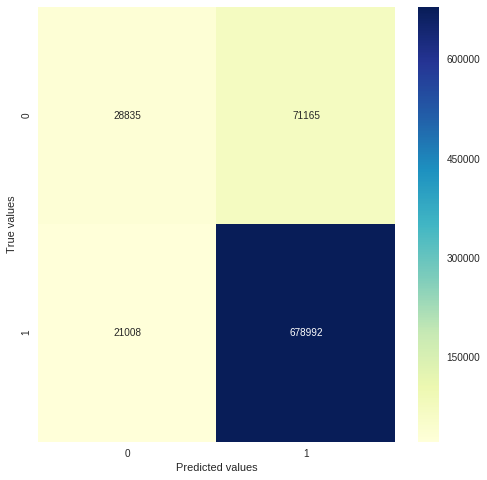

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu");
plt.xlabel("Predicted values")
plt.ylabel("True values")

## Vector size 300

In [19]:
random_cv_lr_label_300 = RandomizedSearchCV(estimator= pipe, param_distributions = param_grid, cv =10,\
                                        error_score = 0,n_iter = 10 , scoring = 'f1', \
                                        return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_label_300.fit(pii_label_matrix_300, fake_pii['Target'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=1, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd5b86922e8>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

In [75]:
%%time
%%notify -m "metric are ready"
from sklearn.metrics import classification_report

binary_pred = random_cv_lr_label_300.predict(pii_label_matrix_300)
binary_true = fake_pii["Target"]
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       0.52      0.19      0.28    100000
           1       0.89      0.98      0.93    700000

   micro avg       0.88      0.88      0.88    800000
   macro avg       0.71      0.58      0.61    800000
weighted avg       0.85      0.88      0.85    800000



<IPython.core.display.Javascript object>

CPU times: user 1.04 s, sys: 222 ms, total: 1.26 s
Wall time: 722 ms


Text(51,0.5,'True values')

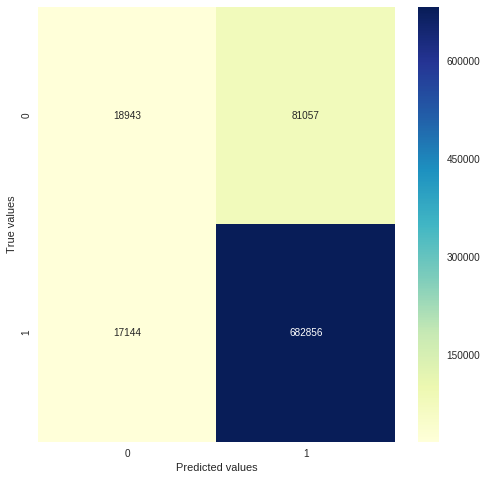

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu")
plt.xlabel("Predicted values")
plt.ylabel("True values")

## Plotting the cross validation results from three different vector size

In [53]:
def _match_re_and_extract_cv_scores(model,all_cv_keys, regex):
    match_keys = re.findall(regex," ".join(all_cv_keys))
    
    cv_scores = dict()
    
    for key in match_keys:
        cv_scores[key] = model.cv_results_[key]
    return cv_scores 


def extract_sk_cv(model, test = True):
    """
    A helper function to extract the training/testing cross validation result
    """
    all_cv_keys = model.cv_results_.keys()
    
    if test:
        sk_cv_result =  _match_re_and_extract_cv_scores(model = model,all_cv_keys = all_cv_keys\
                                                             ,regex = r"split[0-9]+_test_score")
        return pd.DataFrame(sk_cv_result)

    elif not test:
        
        sk_cv_result = _match_re_and_extract_cv_scores(model = model,all_cv_keys = all_cv_keys\
                                                             ,regex = r"split[0-9]+_train_score")
        return pd.DataFrame(sk_cv_result)
        

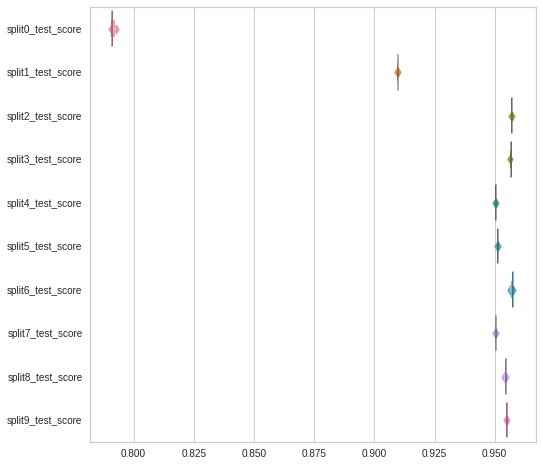

In [74]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.boxenplot(data=extract_sk_cv(random_cv_lr_label_100), orient="h");

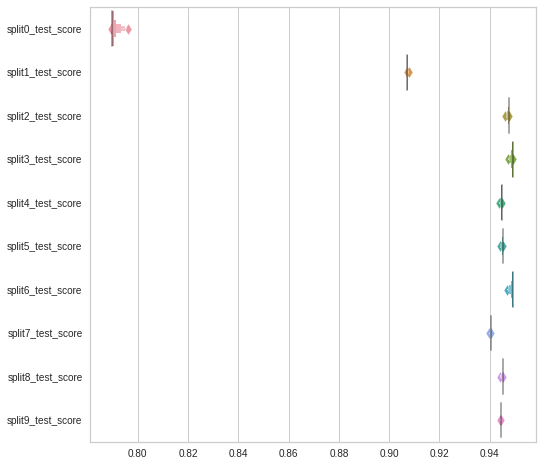

In [81]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.boxenplot(data=extract_sk_cv(random_cv_lr_label_200), orient="h");

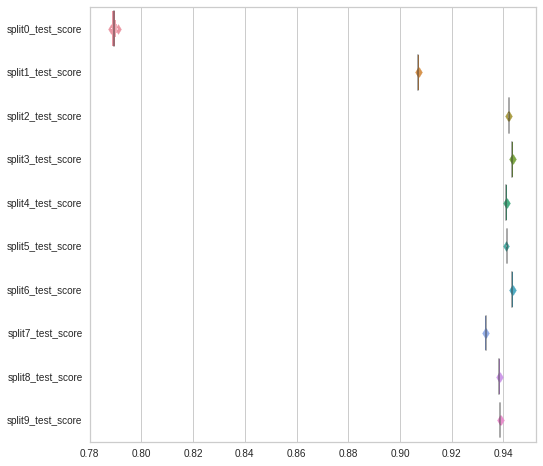

In [72]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.boxenplot(data=extract_sk_cv(random_cv_lr_label_300), orient="h");

## It seems that vector size of 100 is the best for the doc2vec model.

Let us furthur examine this model.

In [83]:
random_cv_lr_label_100.cv_results_['params']

[{'logisticregression__C': 0.41053243671288414,
  'logisticregression__penalty': 'l2'},
 {'logisticregression__C': 1.3292477002785676,
  'logisticregression__penalty': 'l1'},
 {'logisticregression__C': 0.61423350999715909,
  'logisticregression__penalty': 'l2'},
 {'logisticregression__C': 0.43214345878845883,
  'logisticregression__penalty': 'l1'},
 {'logisticregression__C': 1.7050846898300736,
  'logisticregression__penalty': 'l1'},
 {'logisticregression__C': 2.6009319710508771,
  'logisticregression__penalty': 'l2'},
 {'logisticregression__C': 0.35390494437369879,
  'logisticregression__penalty': 'l2'},
 {'logisticregression__C': 0.25093066213065346,
  'logisticregression__penalty': 'l1'},
 {'logisticregression__C': 1.2694576837484794,
  'logisticregression__penalty': 'l1'},
 {'logisticregression__C': 2.8072145672829385,
  'logisticregression__penalty': 'l2'}]

In [84]:
random_cv_lr_label_100.best_params_

{'logisticregression__C': 1.7050846898300736,
 'logisticregression__penalty': 'l1'}

In [85]:
random_cv_lr_label_100.best_estimator_

Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.7050846898300736, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=1, penalty='l1', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

## We can tune the performance by adding class_weight for Logistic regression

In [87]:
%%time
%%notify -m "model finished training"

from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(LogisticRegression(random_state=0 , max_iter=10000,n_jobs = 1,\
                                       class_weight={0:0.7,1:0.1}))

param_grid = {
    'logisticregression__C':expon(scale = 2),
    'logisticregression__penalty':['l1','l2']
}

random_cv_lr_label_100_weights = RandomizedSearchCV(estimator= pipe, param_distributions = param_grid, cv =10,\
                                        error_score = 0,n_iter = 10 , scoring = 'f1', \
                                        return_train_score=True,n_jobs = 2 )
                               


random_cv_lr_label_100_weights.fit(pii_label_matrix_100, fake_pii['Target'])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('logisticregression', LogisticRegression(C=1.0, class_weight={0: 0.7, 1: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd5b18ab3c8>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

<IPython.core.display.Javascript object>

CPU times: user 1min 41s, sys: 1.44 s, total: 1min 42s
Wall time: 57min 53s


In [102]:

from sklearn.metrics import classification_report

binary_pred = random_cv_lr_label_100_weights.predict(pii_label_matrix_100)
binary_true = fake_pii["Target"]
print(classification_report(y_true = binary_true, y_pred = binary_pred))

              precision    recall  f1-score   support

           0       0.48      0.89      0.63    100000
           1       0.98      0.86      0.92    700000

   micro avg       0.87      0.87      0.87    800000
   macro avg       0.73      0.88      0.77    800000
weighted avg       0.92      0.87      0.88    800000



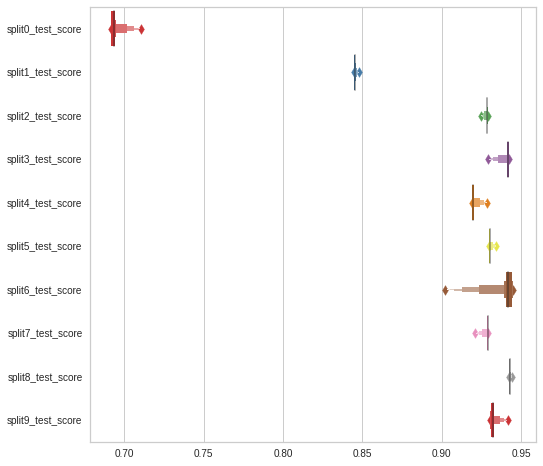

In [99]:
import seaborn as sns
plt.figure(figsize = (8,8))
# test score
sns.boxenplot(data=extract_sk_cv(random_cv_lr_label_100_weights), orient="h", palette = "Set1");

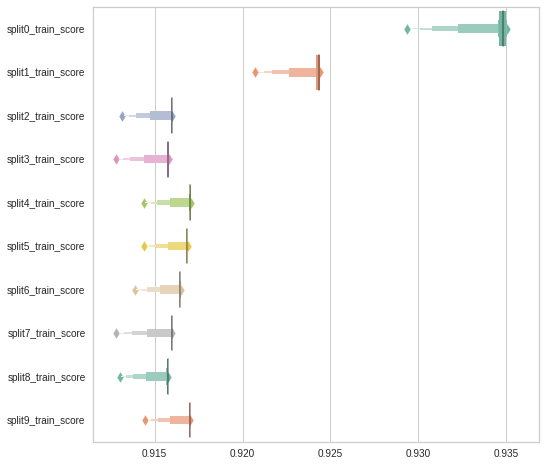

In [98]:
# traning score
plt.figure(figsize = (8,8))
sns.boxenploparagrapht(data=extract_sk_cv(random_cv_lr_label_100_weights, test = False), orient="h", palette = "Set2");

Text(51,0.5,'True values')

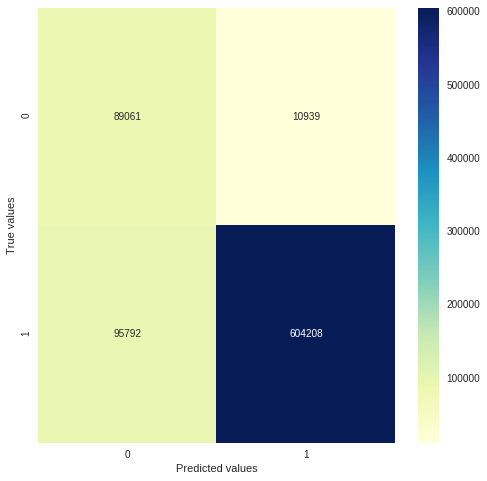

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.heatmap(confusion_matrix(y_true = binary_true, y_pred = binary_pred), annot = True,fmt="d",cmap="YlGnBu");
plt.xlabel("Predicted values")
plt.ylabel("True values")

In [106]:
random_cv_lr_label_100_weights.best_params_

{'logisticregression__C': 0.29326187929189257,
 'logisticregression__penalty': 'l1'}